Sequential AVL Tree

Reference (Chinese): https://www.cnblogs.com/skywang12345/p/3576969.html

In [1]:
from pyAVL import AVL
import random

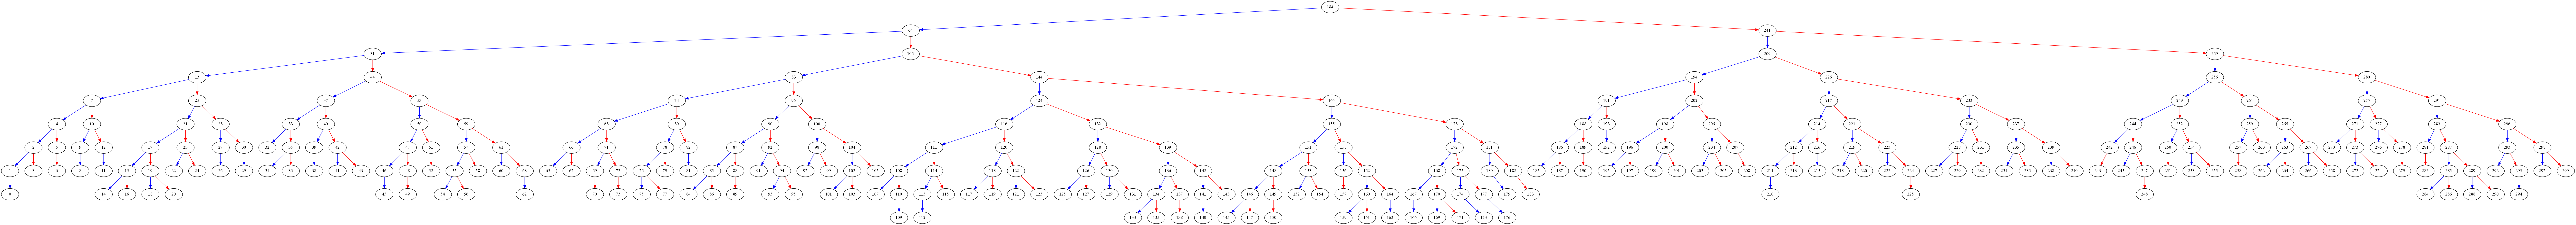

In [2]:
tree = AVL()
ltp = random.sample(list(range(300)),k=300)
for i in ltp:
    tree.put(i)
tree.print()

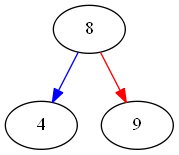

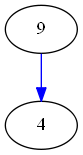

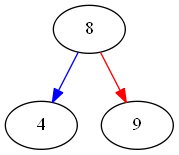

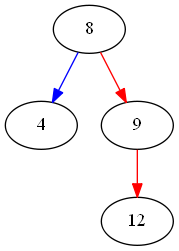

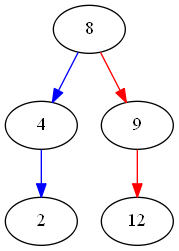

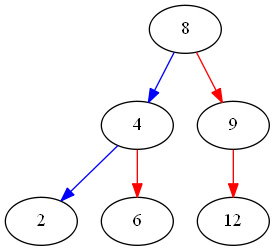

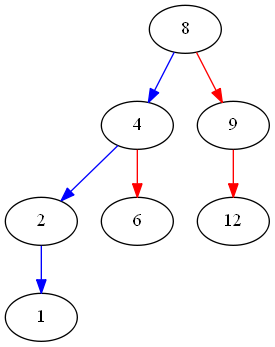

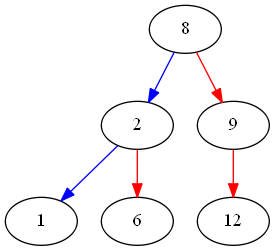

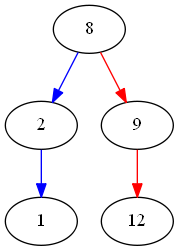

In [3]:
tree = AVL()
tree.put(8)
tree.put(9)
tree.put(4)
tree.print()
tree.remove(8)
tree.print()
tree.put(8)
tree.put(4)
tree.print()
tree.put(12)
tree.print()
tree.put(2)
tree.print()
tree.put(6)
tree.print()
tree.put(1)
tree.print()
tree.remove(4)
tree.print()
tree.remove(6)
tree.print()


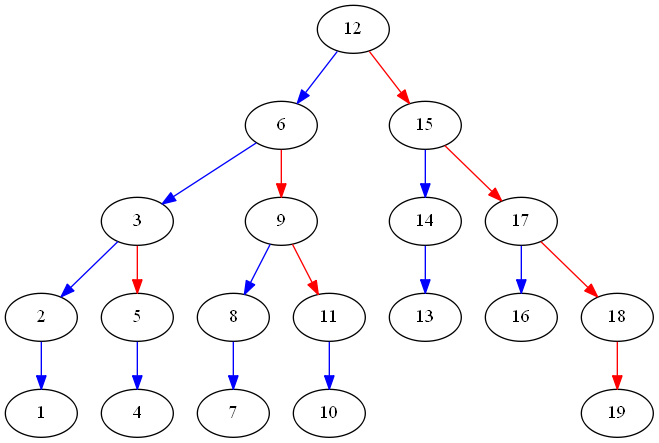

In [4]:
rt = AVL()
for i in range(1,20):
    rt.put(i)
    
rt.print()